**Case Study: BigMart Sales Prediction**

**Context**:
In today's modern world, huge shopping centers such as big malls and marts are recording data related to sales of items or products as an importact step to predict the sales and get an idea about future demands that can help with inventory management. Understanding what role certain properties of an item play and how they affect their sales is imperative to any retail business.

The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. Using this data, **BigMart is trying to understand the properties of products and stores which play a key role in increasing sales**.

**Objective**:
To build a predictive model that you **find out the sales of each product at a particular store and then provide actionable recommendations to the BigMart sales team to understand the properties of products and stores which play a key role in increasing sales**.

**Dataset**:
- Item_Identifier: Product ID
- Item_Weight: Weight of the product
- Item_Fat_Content: whether the product is low fat or not
- Item_Visibility: The % of the total display area of all products in a store allocated to the particular product.
- Item_Type: The category to which the product belongs.
- Outlet_Identifier: unique store ID
- Outlet_Establishment_Year: The year in which the store was established
- Outlet_Size: the size of the store in terms of ground area covered
- Outlet_Location_Type: the type of city in which the store is located
- Outlet_Type: whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particular store. This is the target

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


In [4]:
train_data = pd.read_csv('./data/Train-1.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test_data = pd.read_csv('./data/Test-1.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train_data = train_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_data = test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [9]:
train_data.isnull().any()

Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [10]:
train_data.isnull().sum()/(train_data.shape[0]) * 100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

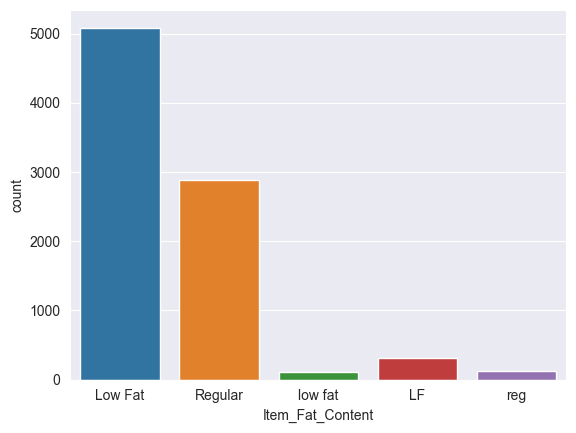

In [11]:
sns.countplot(data=train_data, x=train_data['Item_Fat_Content'])

In [12]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x=='low fat' or x=='LF' else x)
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].apply(lambda x: 'Regular' if x=='reg' else x)
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x=='low fat' or x=='LF' else x)
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].apply(lambda x: 'Regular' if x=='reg' else x)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

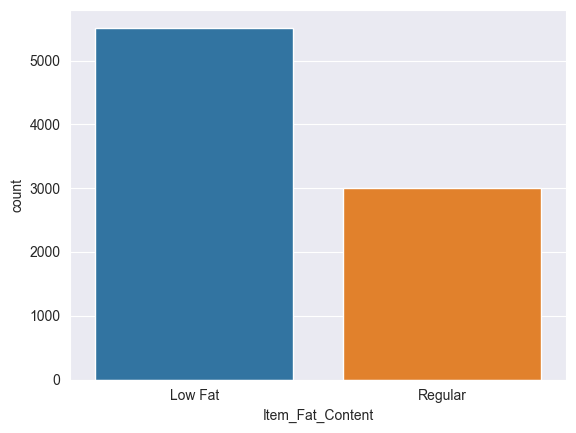

In [13]:
sns.countplot(data=train_data, x=train_data['Item_Fat_Content'])

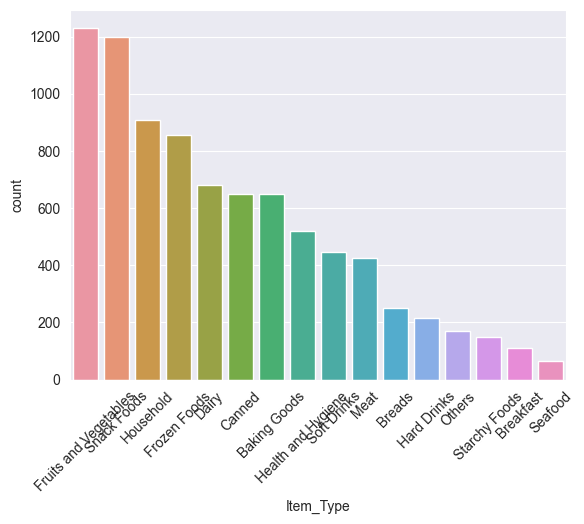

In [21]:
sns.countplot(data=train_data, x='Item_Type', order=train_data['Item_Type'].value_counts().index)
plt.xticks(rotation = 45);

<Axes: xlabel='Outlet_Size', ylabel='count'>

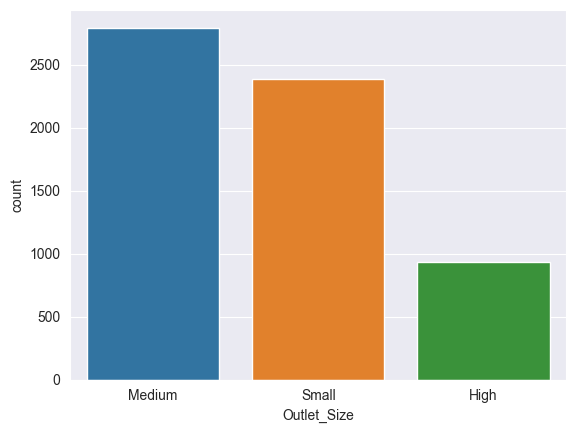

In [17]:
sns.countplot(data=train_data, x=train_data['Outlet_Size'], order=train_data['Outlet_Size'].value_counts().index)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

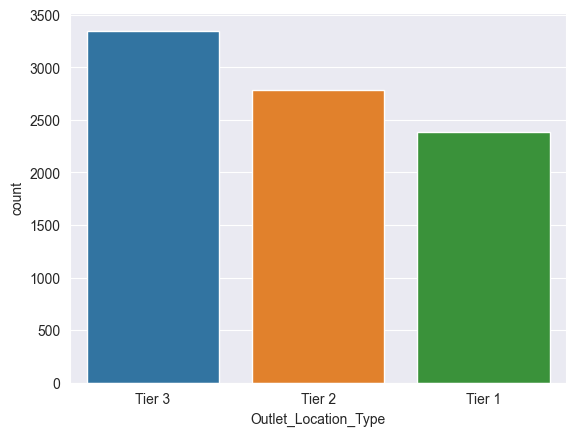

In [18]:
sns.countplot(data=train_data, x=train_data['Outlet_Location_Type'], order=train_data['Outlet_Location_Type'].value_counts().index)

<Axes: xlabel='Outlet_Type', ylabel='count'>

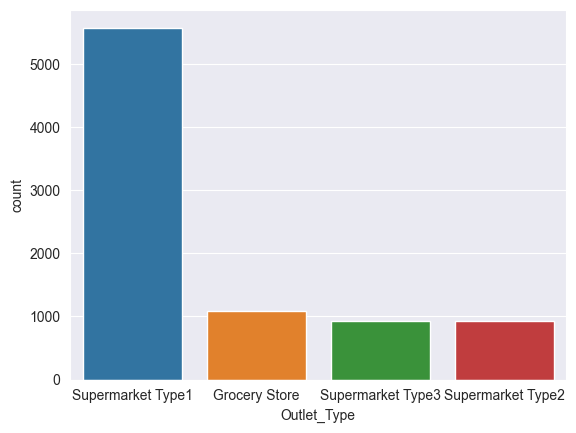

In [19]:
sns.countplot(data=train_data, x=train_data['Outlet_Type'], order=train_data['Outlet_Type'].value_counts().index)

Item_Weight
Skew: 0.0824262091221237


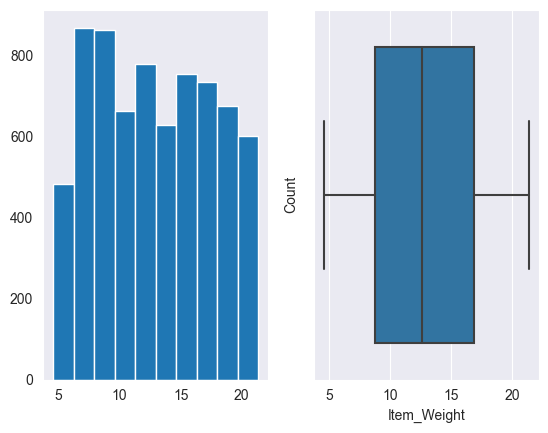

Item_Visibility
Skew: 1.1670905496918396


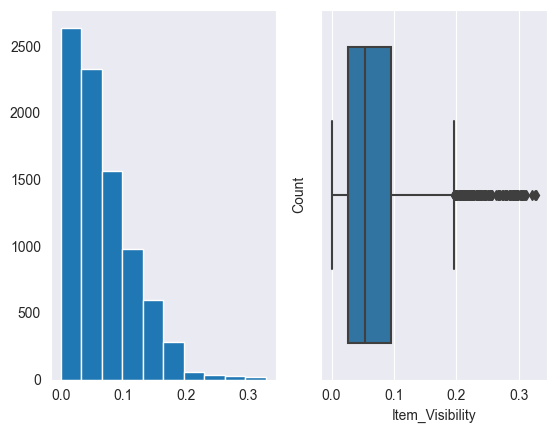

Item_MRP
Skew: 0.1272022683110526


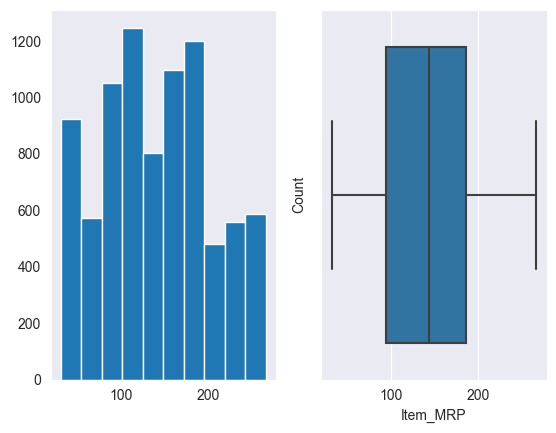

In [25]:
data1 = train_data[['Item_Weight', 'Item_Visibility', 'Item_MRP']]

for col in data1.columns:
    print(col)
    print('Skew:', data1[col].skew())
    plt.subplot(1, 2, 1)
    data1[col].hist(bins=10, grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data1[col])
    plt.ylabel('Count')
    plt.show()

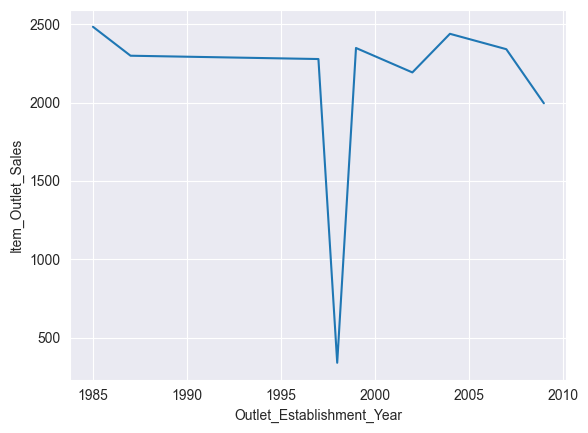

In [26]:
sns.lineplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = train_data, ci = None, estimator = 'mean');

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

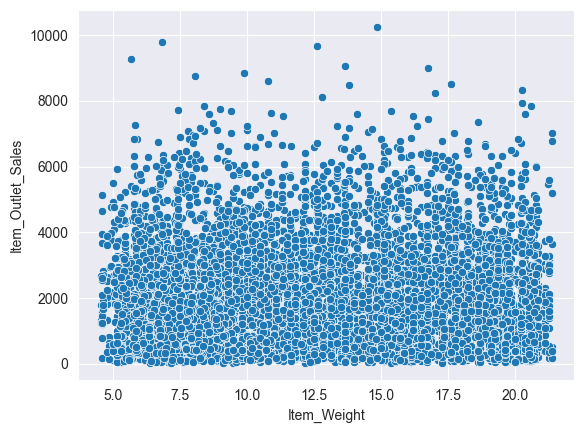

In [29]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train_data)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

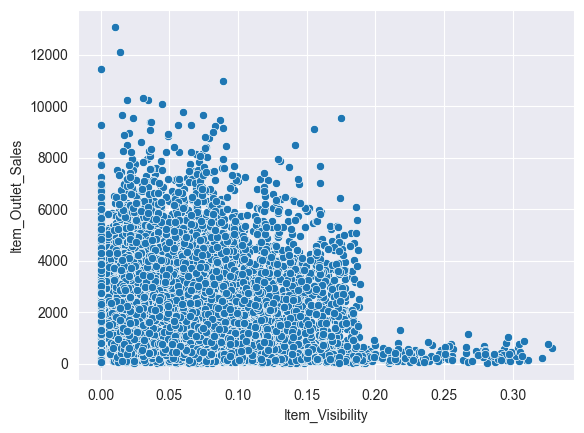

In [30]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=train_data)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

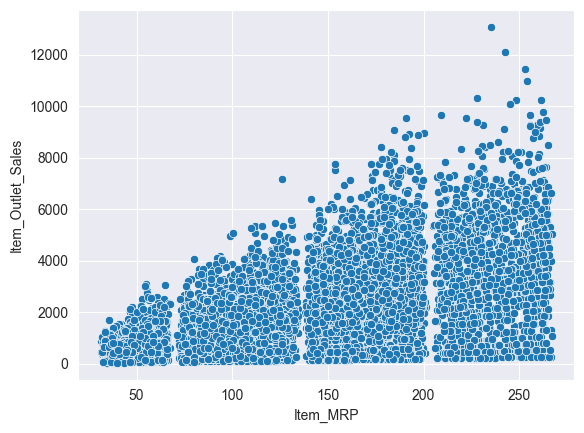

In [31]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_data)

In [41]:
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].median())

In [43]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [45]:
outlet_size_data = train_data[train_data['Outlet_Size'].notnull()]
outlet_size_missing_data = train_data[train_data['Outlet_Size'].isnull()]

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Type'>

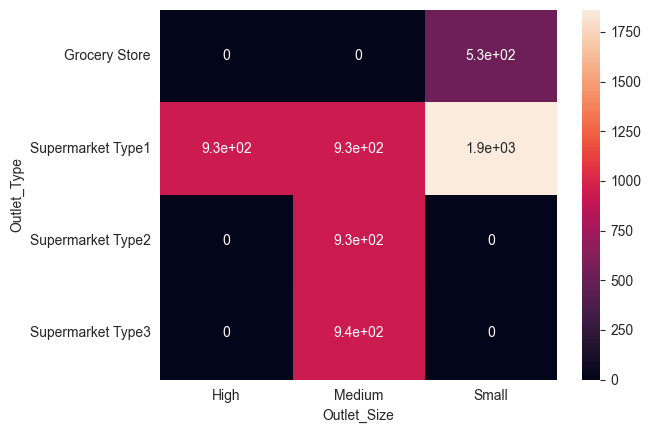

In [46]:
sns.heatmap(pd.crosstab(index=outlet_size_data['Outlet_Type'], columns=outlet_size_data['Outlet_Size']), annot=True)

All the grocery stores have outlet size as small. All the supermarketer type 2 and supermarket type 3 have outlet size as medium

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

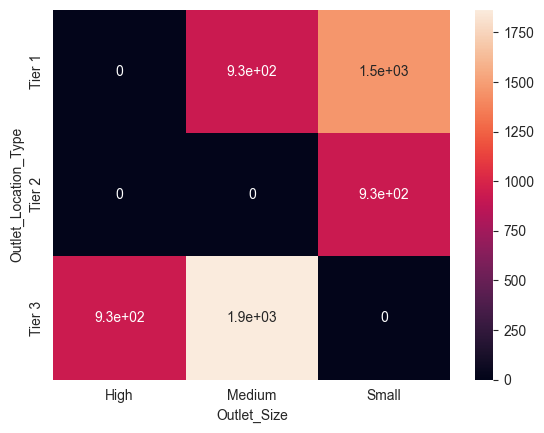

In [47]:
sns.heatmap(pd.crosstab(index=outlet_size_data['Outlet_Location_Type'], columns=outlet_size_data['Outlet_Size']), annot=True)

In [49]:
grocery_store_indices = train_data[train_data['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index

tier_2_indices = train_data[train_data['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

train_data.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'

train_data.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

In [51]:
grocery_store_indices = test_data[test_data['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index

tier_2_indices = test_data[test_data['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index

test_data.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'

test_data.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

In [52]:
train_data['Outlet_Age'] = 2013 - train_data['Outlet_Establishment_Year']
test_data['Outlet_Age'] = 2013 - test_data['Outlet_Establishment_Year']

In [53]:
train_features = train_data.drop(['Item_Outlet_Sales', 'Outlet_Establishment_Year'], axis=1)
train_target = train_data['Item_Outlet_Sales']

In [54]:
train_features = pd.get_dummies(train_features, drop_first=True)
train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,14,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [55]:
scaler = MinMaxScaler()
train_features_scaled = pd.DataFrame(scaler.fit_transform(train_features), columns=train_features.columns, index=train_features.index)
train_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.416667,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [56]:
#Removing Multicollinearity
vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled.values, i) for i in range(train_features_scaled.shape[1])], index=train_features_scaled.columns, dtype=float)

print('VIF Scores', vif_series)

VIF Scores Item_Weight                         4.876413
Item_Visibility                     2.899227
Item_MRP                            4.154178
Outlet_Age                         10.016842
Item_Fat_Content_Regular            1.877755
Item_Type_Breads                    1.389555
Item_Type_Breakfast                 1.172031
Item_Type_Canned                    2.000009
Item_Type_Dairy                     2.064266
Item_Type_Frozen Foods              2.314897
Item_Type_Fruits and Vegetables     2.909520
Item_Type_Hard Drinks               1.363706
Item_Type_Health and Hygiene        1.878749
Item_Type_Household                 2.553340
Item_Type_Meat                      1.658941
Item_Type_Others                    1.287563
Item_Type_Seafood                   1.099670
Item_Type_Snack Foods               2.862044
Item_Type_Soft Drinks               1.712729
Item_Type_Starchy Foods             1.231283
Outlet_Size_Medium                  7.866650
Outlet_Size_Small                   8.135776

In [57]:
train_features_scaled_new = train_features_scaled.drop('Outlet_Age', axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new.values, i) for i in range(train_features_scaled_new.shape[1])], index=train_features_scaled_new.columns, dtype=float
)

print('VIF Scores:', vif_series)

VIF Scores: Item_Weight                        4.763082
Item_Visibility                    2.775160
Item_MRP                           4.085077
Item_Fat_Content_Regular           1.864073
Item_Type_Breads                   1.348345
Item_Type_Breakfast                1.157103
Item_Type_Canned                   1.904766
Item_Type_Dairy                    1.968044
Item_Type_Frozen Foods             2.199543
Item_Type_Fruits and Vegetables    2.738630
Item_Type_Hard Drinks              1.327481
Item_Type_Health and Hygiene       1.784913
Item_Type_Household                2.407992
Item_Type_Meat                     1.597223
Item_Type_Others                   1.252936
Item_Type_Seafood                  1.088652
Item_Type_Snack Foods              2.686878
Item_Type_Soft Drinks              1.635061
Item_Type_Starchy Foods            1.214536
Outlet_Size_Medium                 7.697786
Outlet_Size_Small                  7.968484
Outlet_Location_Type_Tier 2        3.772577
Outlet_Location_Type

In [58]:
#Consider the p-values
ols_model1 = sm.OLS(train_target, train_features_scaled_new)
ols_res_1 = ols_model1.fit()

ols_res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              1622.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:52:39   Log-Likelihood:                         -72041.
No. Observations:                8523   AIC:                                  1.441e+05
Df Residuals:                    8497   BIC:                                  1.443e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                       -80.1050     48.611     -1.648      0.099    -175.395      15.185
Item_Visibility                  -263.9247     80.246     -3.289      0.001    -421.227    -106.622
Item_MRP                         3610.0204     46.445     77.726      0.000    3518.976    3701.064
Item_Fat_Content_Regular           16.8538     28.286      0.596      0.551     -38.593      72.301
Item_Type_Breads                 -136.0207     83.252     -1.634      0.102    -299.216      27.174
Item_Type_Breakfast              -121.0709    116.499     -1.039      0.299    -349.438     107.296
Item_Type_Canned                 -106.7449     61.536     -1.735      0.083    -227.371      13.881
Item_Type_Dairy                  -171.3920     61.018     -2.809      0.005    -291.002     -51.782
Item_Type_Frozen Foods           -155.2714     57.579     -2.697      0.007    -268.140     -42.403
Item_Type_Fruits and Vegetables  -100.4714     53.554     -1.876      0.061    -205.451       4.508
Item_Type_Hard Drinks            -145.3051     89.462     -1.624      0.104    -320.673      30.063
Item_Type_Health and Hygiene     -159.6698     66.549     -2.399      0.016    -290.122     -29.218
Item_Type_Household              -178.0519     58.431     -3.047      0.002    -292.590     -63.514
Item_Type_Meat                   -132.2236     69.634     -1.899      0.058    -268.723       4.276
Item_Type_Others                 -180.7448     97.803     -1.848      0.065    -372.463      10.974
Item_Type_Seafood                  40.7644    148.145      0.275      0.783    -249.636     331.165
Item_Type_Snack Foods            -143.6850     53.749     -2.673      0.008    -249.045     -38.325
Item_Type_Soft Drinks            -173.0174     68.853     -2.513      0.012    -307.985     -38.050
Item_Type_Starchy Foods           -94.1101    102.898     -0.915      0.360    -295.816     107.595
Outlet_Size_Medium               -542.9782     59.632     -9.105      0.000    -659.872    -426.085
Outlet_Size_Small                -736.2977     46.290    -15.906      0.000    -827.038    -645.557
Outlet_Location_Type_Tier 2       154.7097     41.806      3.701      0.000      72.760     236.660
Outlet_Location_Type_Tier 3      -514.8052     44.241    -11.636      0.000    -601.528    -428.083
Outlet_Type_Supermarket Type1    1434.8200     40.334     35.574      0.000    1355.756    1513.884
Outlet_Type_Supermarket Type2    1575.0594     81.110     19.419      0.000    1416.065    1734.054
Outlet_Type_Supermarket Type3    3298.8872     81.131     40.661      0.000    3139.850    3457.924
==============================================================================
Omnib

It is not a good practice to consider VIF values for dummy variables as they are correlated to other categories and hence have a high VIF usually. So we built the model and calculated the p-values. We can see that all the categories in the Item_Type column show a p-value higher than 0.05, so we can drop the item type column

In [59]:
train_features_scaled_new2 = train_features_scaled_new.drop(['Item_Type_Breads',
'Item_Type_Breakfast',
'Item_Type_Canned',
'Item_Type_Dairy',
'Item_Type_Frozen Foods',
'Item_Type_Fruits and Vegetables',
'Item_Type_Hard Drinks',
'Item_Type_Health and Hygiene',
'Item_Type_Household',
'Item_Type_Meat',
'Item_Type_Others',
'Item_Type_Seafood',
'Item_Type_Snack Foods',
'Item_Type_Soft Drinks',
'Item_Type_Starchy Foods'], axis = 1)

In [61]:
vif_series = pd.Series([
    variance_inflation_factor(train_features_scaled_new2.values, i) for i in range(train_features_scaled_new2.shape[1])], index=train_features_scaled_new2.columns, dtype=float)

print('VIF', vif_series)

VIF Item_Weight                      4.675095
Item_Visibility                  2.748754
Item_MRP                         4.003475
Item_Fat_Content_Regular         1.544545
Outlet_Size_Medium               6.697860
Outlet_Size_Small                5.758002
Outlet_Location_Type_Tier 2      3.748961
Outlet_Location_Type_Tier 3      4.257078
Outlet_Type_Supermarket Type1    5.961001
Outlet_Type_Supermarket Type2    4.724138
Outlet_Type_Supermarket Type3    4.764371
dtype: float64


In [62]:
ols_model2 = sm.OLS(train_target, train_features_scaled_new2)
ols_res_2 = ols_model2.fit()

ols_res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              3832.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:59:40   Log-Likelihood:                         -72049.
No. Observations:                8523   AIC:                                  1.441e+05
Df Residuals:                    8512   BIC:                                  1.442e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_Weight                     -94.1727     48.163     -1.955      0.051    -188.584       0.238
Item_Visibility                -273.4451     79.868     -3.424      0.001    -430.006    -116.884
Item_MRP                       3593.3475     45.982     78.148      0.000    3503.213    3683.482
Item_Fat_Content_Regular         37.6265     25.749      1.461      0.144     -12.848      88.101
Outlet_Size_Medium             -613.1212     55.627    -11.022      0.000    -722.165    -504.078
Outlet_Size_Small              -817.3255     39.352    -20.770      0.000    -894.464    -740.187
Outlet_Location_Type_Tier 2     166.2646     41.677      3.989      0.000      84.567     247.962
Outlet_Location_Type_Tier 3    -573.4067     40.494    -14.160      0.000    -652.785    -494.029
Outlet_Type_Supermarket Type1  1382.8984     37.138     37.237      0.000    1310.099    1455.697
Outlet_Type_Supermarket Type2  1582.4470     81.048     19.525      0.000    1423.573    1741.321
Outlet_Type_Supermarket Type3  3306.1816     81.087     40.773      0.000    3147.231    3465.133
==============================================================================
Omnibus:                     1009.169   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2345.598
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                       5.149   Cond. No.                         14.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
train_features_scaled_new3 = train_features_scaled_new2.drop(['Item_Weight'], axis = 1)

vif_series = pd.Series([
    variance_inflation_factor(train_features_scaled_new3.values, i) for i in range(train_features_scaled_new3.shape[1])], index=train_features_scaled_new3.columns, dtype=float)

print('VIF', vif_series)

VIF Item_Visibility                  2.746581
Item_MRP                         3.991550
Item_Fat_Content_Regular         1.544366
Outlet_Size_Medium               6.349820
Outlet_Size_Small                4.981281
Outlet_Location_Type_Tier 2      3.738395
Outlet_Location_Type_Tier 3      3.943205
Outlet_Type_Supermarket Type1    5.543964
Outlet_Type_Supermarket Type2    4.722893
Outlet_Type_Supermarket Type3    4.761284
dtype: float64


In [65]:
ols_model_3 = sm.OLS(train_target, train_features_scaled_new3)

ols_res_3 = ols_model_3.fit()

print(ols_res_3.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              4213.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:20:13   Log-Likelihood:                         -72051.
No. Observations:                8523   AIC:                                  1.441e+05
Df Residuals:                    8513   BIC:                                  1.442e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [66]:
train_features_scaled_new4 = train_features_scaled_new3.drop(['Item_Fat_Content_Regular'], axis = 1)

vif_series = pd.Series([
    variance_inflation_factor(train_features_scaled_new4.values, i) for i in range(train_features_scaled_new4.shape[1])], index=train_features_scaled_new4.columns, dtype=float)

print('VIF', vif_series)

VIF Item_Visibility                  2.735292
Item_MRP                         3.990616
Outlet_Size_Medium               6.311047
Outlet_Size_Small                4.896656
Outlet_Location_Type_Tier 2      3.737122
Outlet_Location_Type_Tier 3      3.913032
Outlet_Type_Supermarket Type1    5.483447
Outlet_Type_Supermarket Type2    4.722853
Outlet_Type_Supermarket Type3    4.761252
dtype: float64


In [67]:
ols_model_5 = sm.OLS(train_target, train_features_scaled_new4)

ols_res_5 = ols_model_5.fit()

print(ols_res_5.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.832
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              4680.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:22:41   Log-Likelihood:                         -72052.
No. Observations:                8523   AIC:                                  1.441e+05
Df Residuals:                    8514   BIC:                                  1.442e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [69]:
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()

train_target_log = np.log(train_target)

cvScore11 = cross_val_score(linearregression, train_features_scaled_new4, train_target_log, cv=10, scoring='neg_mean_squared_error')

cvScore12 = cross_val_score(linearregression, train_features_scaled_new4, train_target_log, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cvScore11.mean(), cvScore11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cvScore12.mean(), cvScore12.std()*2))

RSquared: -0.290 (+/- 0.029)
Mean Squared Error: 0.290 (+/- 0.029)
